In [1]:
import os, sys, time
sys.path.append("../src")

from tqdm import tqdm
import numpy as np
import torch
import argparse
from datasets import load_from_disk
from transformers import ViTForImageClassification
from utils.helper import get_device
from utils.vit_util import transforms
from utils.constant import ViTExperiment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

2024-04-25 21:42:34.338156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 21:42:35.499259: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-04-25 21:42:35.499384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-04-25 21:42:35.499396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
save_dir = os.path.join(getattr(ViTExperiment, ds_name).OUTPUT_DIR, "pred_results")
used_column = "train"

In [3]:
diff_enh_lst, diff_sup_lst = [], []
for tgt_label in range(9):
    ori_proba = np.load(os.path.join(save_dir, f"{used_column}_proba_{tgt_label}.npy"))[:, tgt_label]
    enh_proba = np.load(os.path.join(save_dir, f"{used_column}_proba_ig_list_l9tol12_enhance_{tgt_label}.npy"))[:, tgt_label]
    sup_proba = np.load(os.path.join(save_dir, f"{used_column}_proba_ig_list_l9tol12_suppress_{tgt_label}.npy"))[:, tgt_label]
    # 差分を計算
    diff_enh = enh_proba - ori_proba
    diff_sup = sup_proba - ori_proba
    diff_enh_lst.append(diff_enh)
    diff_sup_lst.append(diff_sup)
diff_enh_lst = np.array(diff_enh_lst)
diff_sup_lst = np.array(diff_sup_lst)

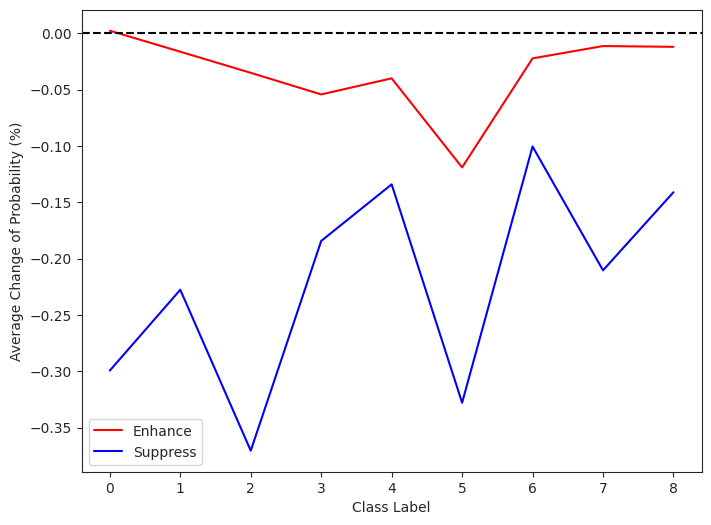

In [5]:
# diff_enh_lstを1軸目方向に平均してプロット
plt.figure(figsize=(8, 6))
plt.plot(diff_enh_lst.mean(axis=1)*100, label="Enhance", color="red")
plt.plot(diff_sup_lst.mean(axis=1)*100, label="Suppress", color="blue")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Class Label")
plt.ylabel("Average Change of Probability (%)")
plt.legend()
plt.show()


In [30]:
# enh_proba - ori_probaの記述統計量を表示
diff = enh_proba - ori_proba
print(f"mean: {diff.mean()}")
print(f"std: {diff.std()}")
print(f"min: {diff.min()}")
print(f"max: {diff.max()}")
print(f"median: {np.median(diff)}")

mean: -0.00011426251876400784
std: 0.0035207250621169806
min: -0.0005973577499389648
max: 0.14048826694488525
median: -0.0002835988998413086


In [18]:
# enh_proba - ori_probaの記述統計量を表示
diff = sup_proba - ori_proba
print(f"mean: {diff.mean()}")
print(f"std: {diff.std()}")
print(f"min: {diff.min()}")
print(f"max: {diff.max()}")
print(f"median: {np.median(diff)}")

mean: -0.0029937182553112507
std: 0.009540350176393986
min: -0.1911107301712036
max: -0.001064300537109375
median: -0.0015617609024047852
